### Prelab

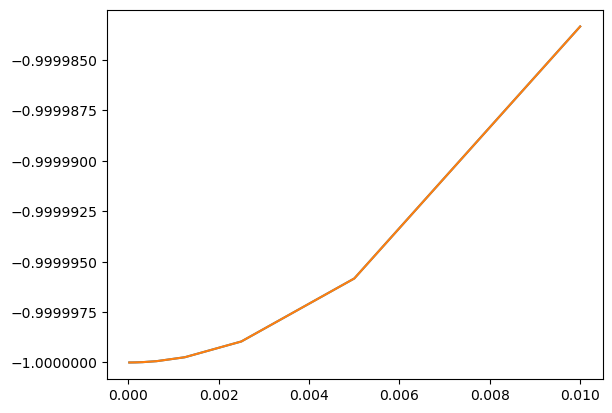

In [93]:
import numpy as np
import math
import time
from matplotlib import pyplot as plt
from numpy.linalg import inv 
from numpy.linalg import norm 
x = np.pi/2.
aitch = 0.01 * 2.** (-np.arange(0,10))

forward = (np.cos(x + h) - np.cos(x))/h
centered = (np.cos(x + h) - np.cos(x - h))/(2 * h) 

plt.plot(h, forward)
plt.plot(h, centered)
plt.ticklabel_format(useOffset=False)
plt.show()


### 3.2 Slacker Newton with given function

In [94]:


def driver():

    x0 = np.array([1.,0.])
    
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  Newton(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)
     
    t = time.time()
    for j in range(50):
      [xstar,ier,its, jack] =  SlackerNewton(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Slacker Newton: the error message reads:',ier) 
    print('Slacker Newton: took this many seconds:',elapsed/50)
    print('Slacker Newton: number of iterations is:',its) 
    print('Slacker Newton: number of Jacobians calculated is:', jack)
        
        
    t = time.time()
    for j in range(20):
      [xstar,ier,its] =  LazyNewton(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Lazy Newton: the error message reads:',ier)
    print('Lazy Newton: took this many seconds:',elapsed/20)
    print('Lazy Newton: number of iterations is:',its)
     
def evalF(x): 

    F = np.zeros(2)
    
    F[0] = 4*x[0]**2 + x[1]**2 - 4
    F[1] = x[0] + x[1] - np.sin(x[0] - x[1])
    return F
    
def evalJ(x): 

    
    J = np.array([[8*x[0], 2*x[1]], 
        [1 - np.cos(x[0] - x[1]), 1 + np.cos(x[0] - x[1])]])
    return J


def Newton(x0,tol,Nmax):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
       J = evalJ(x0)
       Jinv = inv(J)
       F = evalF(x0)
       
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]
           
def LazyNewton(x0,tol,Nmax):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    J = evalJ(x0)
    Jinv = inv(J)
    for its in range(Nmax):

       F = evalF(x0)
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier,its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]   


def SlackerNewton(x0, tol, Nmax):
    jack = 1
    J = evalJ(x0)
    Jinv = inv(J)
    for its in range(Nmax):
       F = evalF(x0)
       
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its, jack]
       
       if its % 3 == 0: #On every 3rd iteration, recompute Jacobian
        J = evalJ(x1)
        Jinv = inv(J)
        jack+=1
        
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its, jack]
    
if __name__ == '__main__':
    # run the drivers only if this is called from the command line
    driver()       

#[ 0.99860694 -0.10553049]
#Newton: the error message reads: 0
#Newton: took this many seconds: 0.00012473106384277343
#Netwon: number of iterations is: 3
#[ 0.99860694 -0.10553049]
#Slacker Newton: the error message reads: 0
#Slacker Newton: took this many seconds: 8.328437805175781e-05
#Slacker Netwon: number of iterations is: 4
#[ 0.99860694 -0.10553049]
#Lazy Newton: the error message reads: 0
#Lazy Newton: took this many seconds: 0.00015119314193725585
#Lazy Newton: number of iterations is: 7


[ 0.99860694 -0.10553049]
Newton: the error message reads: 0
Newton: took this many seconds: 8.172035217285156e-05
Netwon: number of iterations is: 3
[ 0.99860694 -0.10553049]
Slacker Newton: the error message reads: 0
Slacker Newton: took this many seconds: 8.828163146972656e-05
Slacker Newton: number of iterations is: 4
Slacker Newton: number of Jacobians calculated is: 3
[ 0.99860694 -0.10553049]
Lazy Newton: the error message reads: 0
Lazy Newton: took this many seconds: 0.0
Lazy Newton: number of iterations is: 7


4. My lab partner's method was to use Newton's Method until the distance between iterations was below 0.1, and then halt the recomputing of the Jacobian and in effect switch to Lazy Newton. We both have 4 iterations, I have 3 Jacobian computations. Her method required one less Jacobian computation but mine takes less seconds!

### 3.2 Slacker Function with Class Example

In [95]:
def driver():

    x0 = np.array([0.1, 0.1, -0.1])
    
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  Newton(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)
     
    t = time.time()
    for j in range(20):
      [xstar,ier,its] =  LazyNewton(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Lazy Newton: the error message reads:',ier)
    print('Lazy Newton: took this many seconds:',elapsed/20)
    print('Lazy Newton: number of iterations is:',its)
     
  
    t = time.time()
    for j in range(50):
      [xstar,ier,its, jack] =  SlackerNewton(x0,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Slacker Newton: the error message reads:',ier)
    print('Slacker Newton: took this many seconds:',elapsed/50)
    print('Slacker Newton: number of iterations is:',its)
    print('Slacker Newton: number of Jacobians calculated is:', jack)
    
    
def evalF(x): 

    F = np.zeros(3)
    
    F[0] = 3*x[0]-math.cos(x[1]*x[2])-1/2
    F[1] = x[0]-81*(x[1]+0.1)**2+math.sin(x[2])+1.06
    F[2] = np.exp(-x[0]*x[1])+20*x[2]+(10*math.pi-3)/3
    return F
    
def evalJ(x): 

    
    J = np.array([[3.0, x[2]*math.sin(x[1]*x[2]), x[1]*math.sin(x[1]*x[2])], 
        [2.*x[0], -162.*(x[1]+0.1), math.cos(x[2])], 
        [-x[1]*np.exp(-x[0]*x[1]), -x[0]*np.exp(-x[0]*x[1]), 20]])
    return J


def Newton(x0,tol,Nmax):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
       J = evalJ(x0)
       Jinv = inv(J)
       F = evalF(x0)
       
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]
           
def LazyNewton(x0,tol,Nmax):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    J = evalJ(x0)
    Jinv = inv(J)
    for its in range(Nmax):

       F = evalF(x0)
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier,its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]   
    
def SlackerNewton(x0, tol, Nmax):
    jack = 1
    J = evalJ(x0)
    Jinv = inv(J)
    for its in range(Nmax):
       F = evalF(x0)
       
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its,jack]
       
       if its % 3 == 0: #On every 3rd iteration, recompute Jacobian
        J = evalJ(x1)
        Jinv = inv(J)
        jack += 1
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its,jack]    
        
if __name__ == '__main__':
    # run the drivers only if this is called from the command line
    driver()       

#[ 0.49999052  0.01441216 -0.52323977]
#Newton: the error message reads: 0
#Newton: took this many seconds: 0.00013873100280761719
#Netwon: number of iterations is: 4
#[ 0.49999052  0.01441216 -0.52323977]
#Lazy Newton: the error message reads: 0
#azy Newton: took this many seconds: 0.0008111357688903809
#Lazy Newton: number of iterations is: 22
#[ 0.49999052  0.01441216 -0.52323977]
#20 Slacker Newton: the error message reads: 0
#Slacker Newton: took this many seconds: 0.0
#Slacker Newton: number of iterations is: 5
#[ 0.49999052  0.01441216 -0.52323977]
#50 Slacker Newton: the error message reads: 0
#Slacker Newton: took this many seconds: 0.0002512407302856445
#Slacker Newton: number of iterations is: 5


[ 0.49999052  0.01441216 -0.52323977]
Newton: the error message reads: 0
Newton: took this many seconds: 0.00014828681945800782
Netwon: number of iterations is: 4
[ 0.49999052  0.01441216 -0.52323977]
Lazy Newton: the error message reads: 0
Lazy Newton: took this many seconds: 5.4848194122314456e-05
Lazy Newton: number of iterations is: 22
[ 0.49999052  0.01441216 -0.52323977]
Slacker Newton: the error message reads: 0
Slacker Newton: took this many seconds: 0.0
Slacker Newton: number of iterations is: 5
Slacker Newton: number of Jacobians calculated is: 3


5. Directly above is the example question from class. It only needs one more iteration than Newton's method two more Jacobian compution, while requiring 17 less iterations than Lazy Newton's Method. My lab partner's method needed one less Jacobian, but 8 whole iterations instead of only 5, and her's took longer too.  

### 3.3 Newton and Hybrid with an Approximate Jacobian

In [96]:
import numpy as np
import math
import time
from numpy.linalg import inv 
from numpy.linalg import norm 

def driver():

    x0 = np.array([1.,0.])
    h1 = norm(x0)*1e-7
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  Newton(x0,h1,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)
    
     
  
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  SlackerNewton(x0,h1,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Slacker Newton: the error message reads:',ier)
    print('Slacker Newton: took this many seconds:',elapsed/50)
    print('Slacker Newton: number of iterations is:',its)
    
def evalF(x): 

    F = np.zeros(2)
    
    F[0] = 4*x[0]**2 + x[1]**2 - 4
    F[1] = x[0] + x[1] - np.sin(x[0] - x[1])
    return F

def evalapJ(x,h):
    fx1 = ((4*(x[0]+h)**2 + x[1]**2 - 4)-(4*x[0]**2 + x[1]**2 - 4))/h
    fx2 = ((4*x[0]**2 + (x[1]+h)**2 - 4)-(4*x[0]**2 + x[1]**2 - 4))/h
    gx1 = (((x[0]+h) + x[1] - np.sin((x[0]+h) - x[1]))-( x[0] + x[1] - np.sin(x[0] - x[1])))/h
    gx2 = ((x[0] + (x[1]+h) - np.sin(x[0] - (x[1]+h)))- (x[0] + x[1] - np.sin(x[0] - x[1])))/h
    apJ = np.array([[fx1,fx2],[gx1,gx2]])
                                                                                                     
    return apJ

                   
                   
def Newton(x0,h1,tol,Nmax):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
       apJ = evalapJ(x0,h1)
       apJinv = inv(apJ)
       F = evalF(x0)
       
       x1 = x0 - apJinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]
           


def SlackerNewton(x0,h1, tol, Nmax):
    apJ = evalapJ(x0,h1)
    apJinv = inv(apJ)
    for its in range(Nmax):
       F = evalF(x0)
       
       x1 = x0 - apJinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
       
       if its % 3 == 0: #On every 3rd iteration, recompute Jacobian
        apJ = evalapJ(x1,h1)
        apJinv = inv(apJ)
        
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]
    
if __name__ == '__main__':
    # run the drivers only if this is called from the command line
    driver()


[ 0.99860694 -0.10553049]
Newton: the error message reads: 0
Newton: took this many seconds: 0.00016857624053955077
Netwon: number of iterations is: 3
[ 0.99860694 -0.10553049]
Slacker Newton: the error message reads: 0
Slacker Newton: took this many seconds: 1.2912750244140624e-05
Slacker Newton: number of iterations is: 4


In [97]:
def driver():

    x0 = np.array([1.,0.])
    h1 = norm(x0)*1e-3
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  Newton(x0,h1,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)
     
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  SlackerNewton(x0,h1,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Slacker Newton: the error message reads:',ier) 
    print('Slacker Newton: took this many seconds:',elapsed/50)
    print('Slacker Netwon: number of iterations is:',its) 
driver()

[ 0.99860694 -0.10553049]
Newton: the error message reads: 0
Newton: took this many seconds: 0.00024806976318359375
Netwon: number of iterations is: 4
[ 0.99860694 -0.10553049]
Slacker Newton: the error message reads: 0
Slacker Newton: took this many seconds: 4.1141510009765626e-05
Slacker Netwon: number of iterations is: 4


More iterations are required when h is larger

### Approximate Jacobian with Class Example 

In [98]:
import numpy as np
import math
import time
from numpy.linalg import inv 
from numpy.linalg import norm 

def driver():

    x0 = np.array([0.1,0.1,-0.1])
    h1 = norm(x0)*1e-3
    Nmax = 100
    tol = 1e-10
    
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  Newton(x0,h1,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Newton: the error message reads:',ier) 
    print('Newton: took this many seconds:',elapsed/50)
    print('Netwon: number of iterations is:',its)
     
    t = time.time()
    for j in range(50):
      [xstar,ier,its] =  SlackerNewton(x0,h1,tol,Nmax)
    elapsed = time.time()-t
    print(xstar)
    print('Slacker Newton: the error message reads:',ier) 
    print('Slacker Newton: took this many seconds:',elapsed/50)
    print('Slacker Netwon: number of iterations is:',its)    
 
     
def evalF(x): 

    F = np.zeros(3)
    
    F[0] = 3*x[0]-math.cos(x[1]*x[2])-1/2
    F[1] = x[0]-81*(x[1]+0.1)**2+math.sin(x[2])+1.06
    F[2] = np.exp(-x[0]*x[1])+20*x[2]+(10*math.pi-3)/3
    return F

def evalapJ(x,h):
    fx1 = ( (3*(x[0]+h)-math.cos(x[1]*x[2])-1/2)  -  (3*x[0]-math.cos(x[1]*x[2])-1/2) )/h
    fx2 = ( (3*x[0]-math.cos((x[1]+h)*x[2])-1/2)-(3*x[0]-math.cos(x[1]*x[2])-1/2))/h
    fx3 = ( (3*x[0]-math.cos((x[1])*(x[2]+h))-1/2)-(3*x[0]-math.cos(x[1]*x[2])-1/2))/h
    
    gx1 = ( ((x[0]+h)-81*(x[1]+0.1)**2+math.sin(x[2])+1.06)-(x[0]-81*(x[1]+0.1)**2+math.sin(x[2])+1.06))/h
    gx2 = ( ((x[0])-81*((x[1]+h)+0.1)**2+math.sin(x[2])+1.06)-(x[0]-81*(x[1]+0.1)**2+math.sin(x[2])+1.06))/h
    gx3 = ( ((x[0])-81*(x[1]+0.1)**2+math.sin((x[2]+h))+1.06)-(x[0]-81*(x[1]+0.1)**2+math.sin(x[2])+1.06))/h
    
    hx1 = ( (np.exp(-(x[0]+h)*x[1])+20*x[2]+(10*math.pi-3)/3) - (np.exp(-x[0]*x[1])+20*x[2]+(10*math.pi-3)/3))/h
    hx2 = ( (np.exp(-(x[0])*(x[1]+h))+20*x[2]+(10*math.pi-3)/3) - (np.exp(-x[0]*x[1])+20*x[2]+(10*math.pi-3)/3))/h
    hx3 = ( (np.exp(-(x[0])*x[1])+20*(x[2]+h)+(10*math.pi-3)/3) - (np.exp(-x[0]*x[1])+20*x[2]+(10*math.pi-3)/3))/h
    apJ = np.array([[fx1,fx2,fx3],[gx1,gx2,gx3],[hx1,hx2,hx3]])
                                                                                                     
    return apJ
                   
                   
def Newton(x0,h1,tol,Nmax):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
       apJ = evalapJ(x0,h1)
       apJinv = inv(apJ)
       F = evalF(x0)
       
       x1 = x0 - apJinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]
           


def SlackerNewton(x0,h1, tol, Nmax):
    apJ = evalapJ(x0,h1)
    apJinv = inv(apJ)
    for its in range(Nmax):
       F = evalF(x0)
       
       x1 = x0 - apJinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
       
       if its % 3 == 0: #On every 3rd iteration, recompute Jacobian
        apJ = evalapJ(x1,h1)
        apJinv = inv(apJ)
        
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]
    
if __name__ == '__main__':
    # run the drivers only if this is called from the command line
    driver()


[ 0.49999052  0.01441216 -0.52323977]
Newton: the error message reads: 0
Newton: took this many seconds: 0.00020787715911865234
Netwon: number of iterations is: 5
[ 0.49999052  0.01441216 -0.52323977]
Slacker Newton: the error message reads: 0
Slacker Newton: took this many seconds: 0.0002697181701660156
Slacker Netwon: number of iterations is: 6
